In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_orig = pd.read_csv("ObesityDataSet.csv")

In [3]:
print(df_train.columns)
print(df_train.shape)
df_train.head()

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
(20758, 18)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
print(df_orig.columns)
print(df_orig.shape)
df_orig.head()

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
print(df_test.columns)
print(df_test.shape)
df_test.head()

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')
(13840, 17)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
train_combined = pd.concat([df_train.drop("id", axis=1), df_orig], axis=0)
print(train_combined.shape)

(22869, 17)


In [7]:
train_combined.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
print(f"Number of missing value in training data - {train_combined.isnull().sum().sum()}")
print(f"Number of missing value in test data - {df_test.isnull().sum().sum()}")


Number of missing value in training data - 0
Number of missing value in test data - 0


In [9]:
target = "NObeyesdad"
train_combined[target].value_counts()

Obesity_Type_III       4370
Obesity_Type_II        3545
Normal_Weight          3369
Obesity_Type_I         3261
Overweight_Level_II    2812
Insufficient_Weight    2795
Overweight_Level_I     2717
Name: NObeyesdad, dtype: int64

In [10]:
train_combined.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,22869.000000,23.885263,5.753419,14.000000,20.000000,22.815416,26.000000,61.000000
Height,22869.000000,1.700377,0.087881,1.450000,1.631662,1.700000,1.763029,1.980000
Weight,22869.000000,87.767610,26.364243,39.000000,66.000000,84.000000,111.531208,173.000000
FCVC,22869.000000,2.443428,0.533329,1.000000,2.000000,2.392665,3.000000,3.000000
NCP,22869.000000,2.754344,0.712711,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,22869.000000,2.027442,0.608901,1.000000,1.755907,2.000000,2.535127,3.000000
FAF,22869.000000,0.984382,0.839466,0.000000,0.015860,1.000000,1.596576,3.000000
TUE,22869.000000,0.620551,0.602850,0.000000,0.000000,0.579541,1.000000,2.000000


In [11]:
train_combined.describe(include =["object"]).T.style.background_gradient()

,count,unique,top,freq
Gender,22869,2,Female,11465
family_history_with_overweight,22869,2,yes,18740
FAVC,22869,2,yes,20848
CAEC,22869,4,Sometimes,19294
SMOKE,22869,2,no,22580
SCC,22869,2,no,22086
CALC,22869,4,Sometimes,16467
MTRANS,22869,5,Public_Transportation,18267
NObeyesdad,22869,7,Obesity_Type_III,4370


In [12]:
train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             2

In [13]:
# from ydata_profiling import ProfileReport
# data_profile = ProfileReport(train_combined, title = "Data Profile")
# data_profile.to_file("data_summary.html")

In [14]:
num_vars = train_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_vars = train_combined.select_dtypes(include=['object']).columns.tolist()

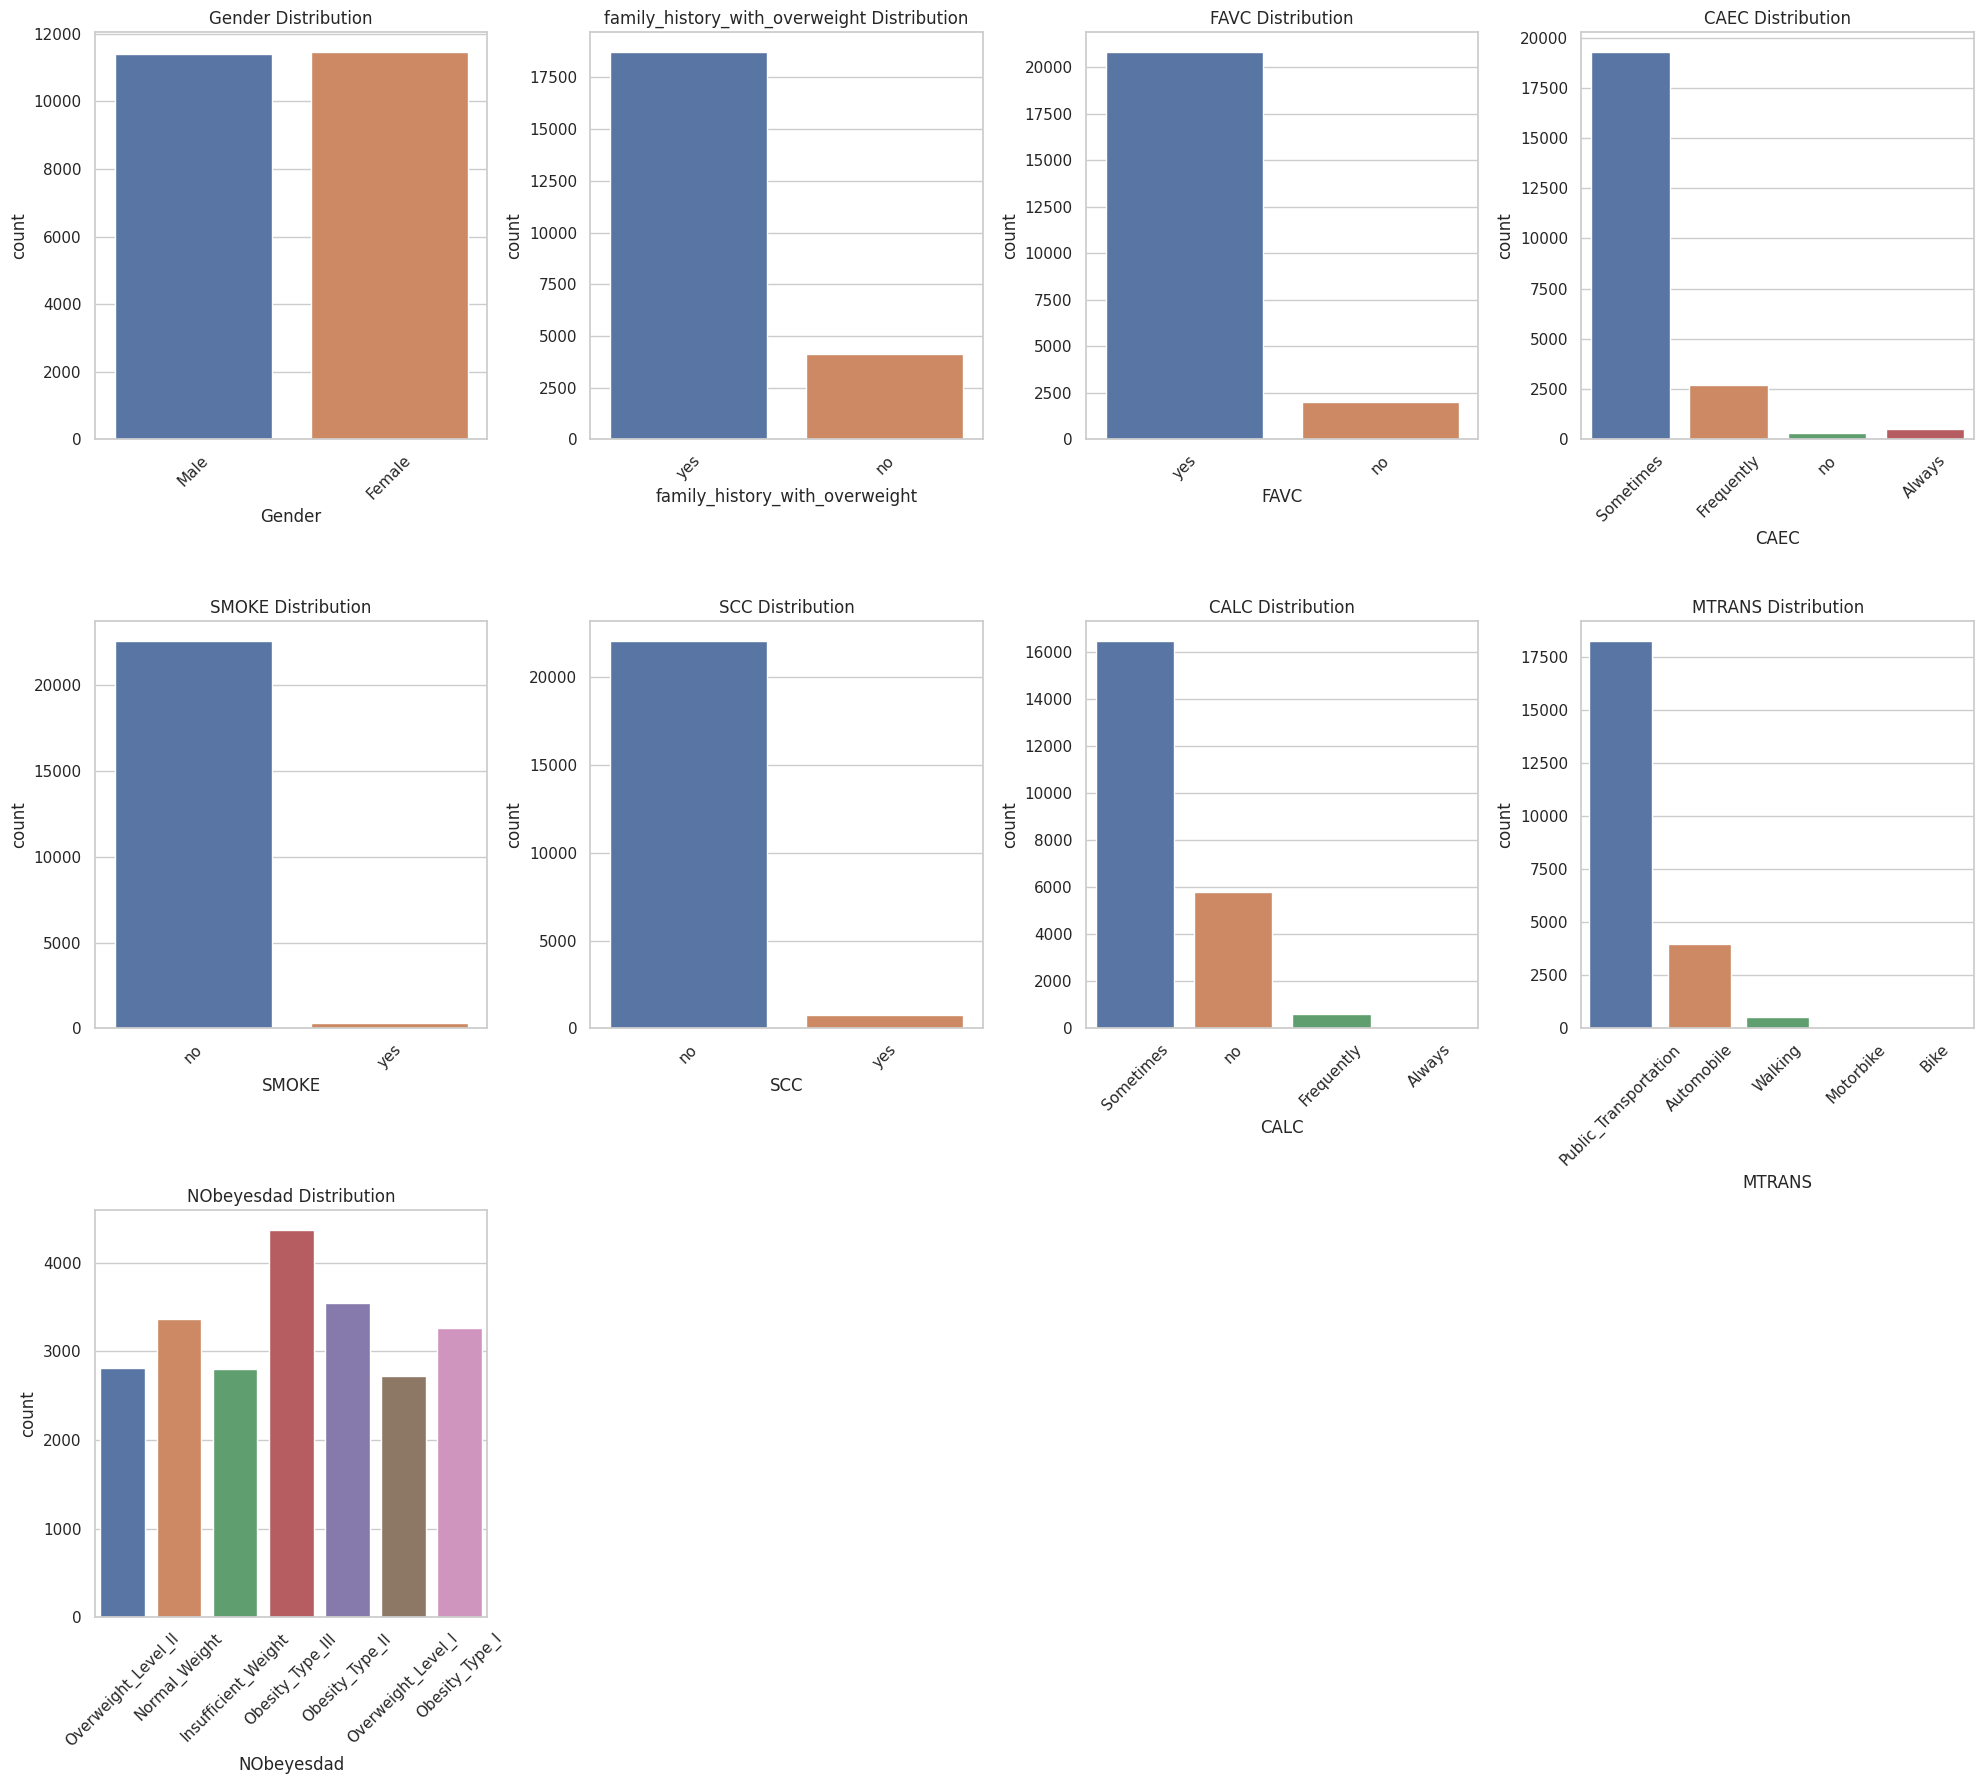

In [15]:
num_cols = len(cat_vars)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(cat_vars,1):
    plt.subplot(num_rows, 4, i)
    sns.countplot(x= col, data=train_combined)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# num_cols = len(num_vars)
# num_rows = -(-num_cols // 4)


# plt.figure(figsize=(20,6 *num_rows))
# for i ,col in enumerate(num_vars,1):
#     plt.subplots(num_rows, 4, i)
#     sns.histplot(x= col, data=train_combined, hue="NObeyesdad", kde=True)
#     plt.ylim(0,500)
#     plt.title(f'{col} Distribution')
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


for column in num_vars:
    fig, ax = plt.subplots(figsize=(20, 10))
    fig = sns.histplot(data=train_combined, x=column, hue="NObeyesdad", bins=50, kde=True)
    plt.ylim(0,500)
    plt.show()

In [ ]:
# plt.figure(figsize=(12,10))
# sns.heatmap(train_combined[num_vars], annot=True, cmap='coolwarm', fmt='.2f', linewidths= 0.5)
# plt.title('Correlation Matrix of Features')

### Start of modelling by onehot encoding categotical variables and scaling numerical variables

In [16]:
cat_vars.remove("NObeyesdad")

In [17]:
train_transform = pd.get_dummies(train_combined,
                       columns=cat_vars)
test_transform = pd.get_dummies(df_test, 
                      columns=cat_vars)
train_transform.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,1,...,0,0,0,0,1,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,1,...,0,0,0,0,1,0,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
train_Y = train_transform["NObeyesdad"]
train_transform.drop(columns=["NObeyesdad"], inplace=True)

# test_transform.head()
ids = test_transform["id"]
test_transform.drop(columns=["id"], inplace=True)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
numerical_transformers = Pipeline(steps=[("scaler", StandardScaler())])
pre_processor = ColumnTransformer(transformers=[('num', numerical_transformers, num_vars)])

In [21]:
pre_processor.fit(train_transform)
X = pre_processor.transform(train_transform)
test_df = pre_processor.transform(test_transform)

In [22]:
target_encode = LabelEncoder()
y = target_encode.fit_transform(train_Y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18295, 8)
X_test shape: (4574, 8)
y_train shape: (18295,)
y_test shape: (4574,)


In [24]:
!pip install lazypredict

In [25]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None) 

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)